# Testing Random Forest Model

# New Section

Importing data and necessary library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from google.colab import drive


drive.mount('/content/drive') #Connecting our colab with our Drive

file_path = "/content/drive/Shareddrives/IS24/Data.csv"

data = []
data = pd.read_csv("/content/drive/Shareddrives/IS24/Data.csv") # Reading Initial Data

Mounted at /content/drive


USE PICKLE TO LOAD FILE WITHOUT RE-READING THEM. ALSO help with re-read variables
Load data without reread the data.

Preparing Data For analysis:
1. Change value to booleans
2. Change categorical values to dummy

Running Random Forest classification

In [2]:
selected_features_rfe = [
    "FACIND_1",
    "FACSEC_1",
    "BACARN_51",
    "BACARN_54",
    "VETSTAT_2",
    "BACARN_56",
    "FACBEN_4",
    "FACSEC_L",
    "FACIND_L",
    "FACADV_L",
    "FACCHAL_L",
    "FACLOC_L",
    "FACRESP_L",
    "FACSAL_L",
    "FACBEN_L",
    "FACSAL_4",
    "MARIND"
]

X = data[selected_features_rfe]
# X = data.drop('LFSTAT', axis=1)  # predictor variables

# X = data[["FACIND_1", "FACSEC_1", "BACARN_51", "BACARN_54", "VETSTAT_2", "BACARN_56", "FACBEN_4"]]
y = data['LFSTAT']


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #tts
rf_classifier = RandomForestClassifier(n_estimators=30, random_state=42)#RDC
fitted_ = rf_classifier.fit(X_train, y_train)#fitting

y_pred = fitted_.predict(X_test)

Visualize the model

Accuracy: 0.9600863775418391


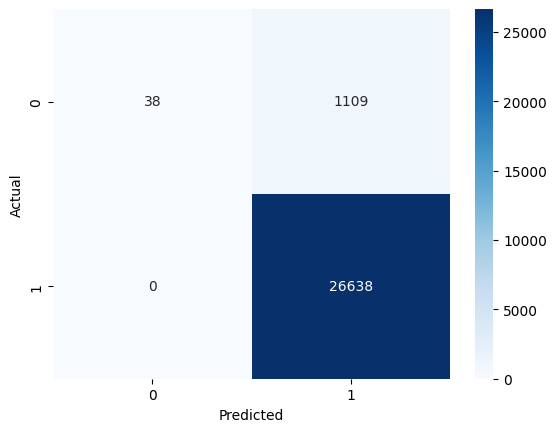

In [4]:
# Evaluate accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [5]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       1.00      0.03      0.06      1147
        True       0.96      1.00      0.98     26638

    accuracy                           0.96     27785
   macro avg       0.98      0.52      0.52     27785
weighted avg       0.96      0.96      0.94     27785



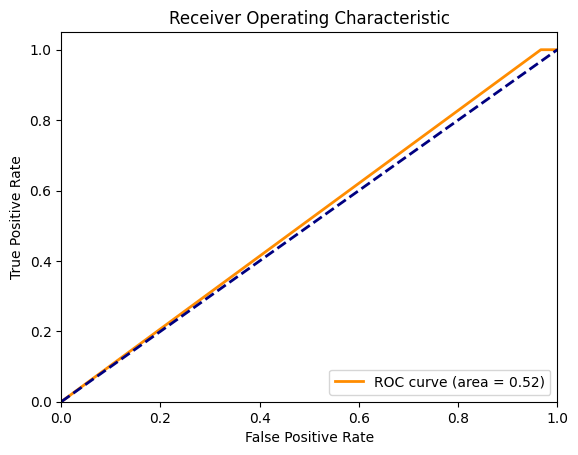

In [6]:
# Assuming binary classification
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
